In [51]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [81]:
N = 100
X = np.random.rand(N, 1) * 6 - 3
y = X**2 + np.random.rand(N, 1)*2 + 2

# Adding polymonial features

In [82]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)[:, 1:]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

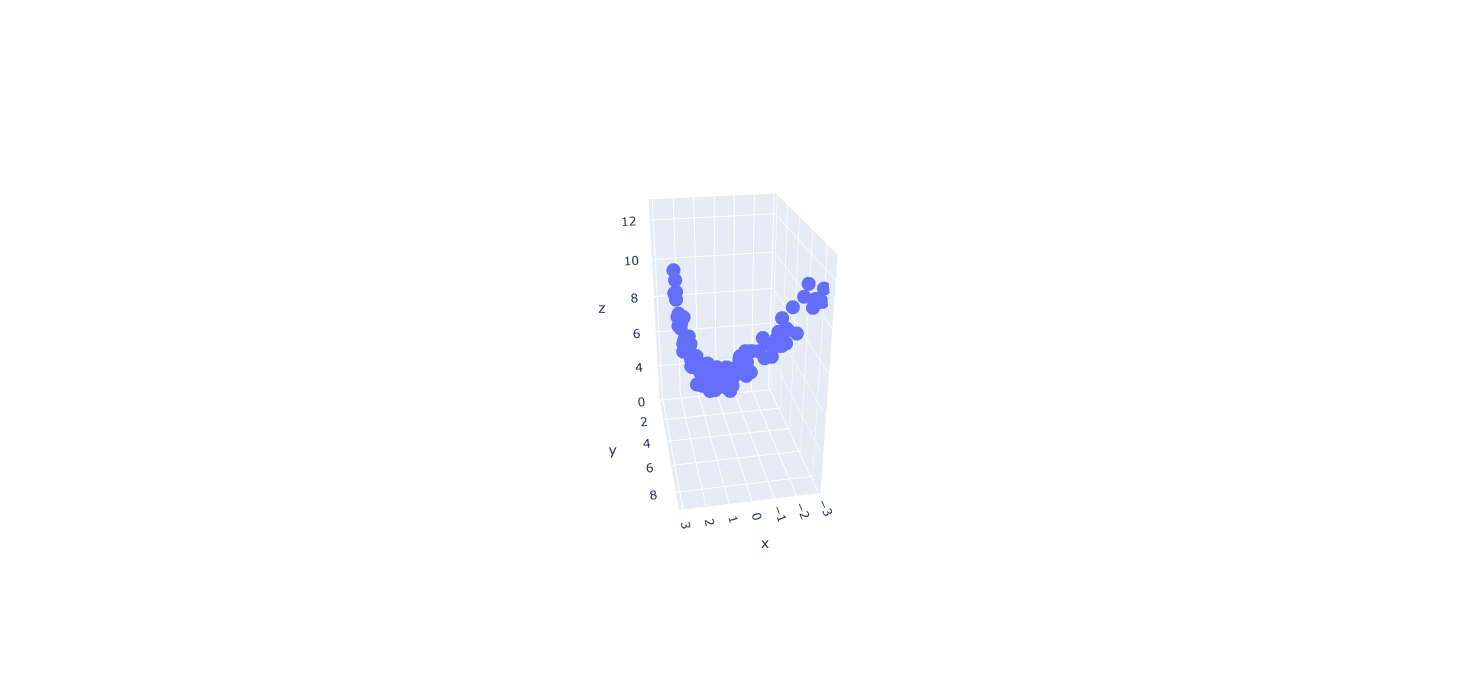

In [144]:
px.scatter_3d(x=(X_poly[:, 0]),
              y=(X_poly[:, 1]),
              z=(y.flatten()),
              width=700, height=700)

# Training & testing

In [85]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

In [88]:
lr.score(X_test, y_test)

0.9739252396180085

# Visualizing learning curve

In [190]:
curve_x = X_poly[X_poly[:, 0].argsort()]
curve_y = np.sum(curve_x * lr.coef_, axis=1) + lr.intercept_

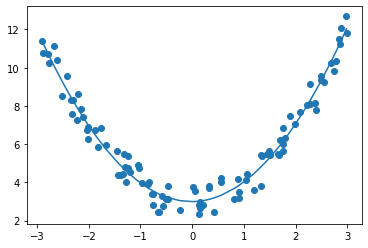

In [191]:
plt.scatter(X, y)
plt.plot(curve_x[:, 0], curve_y)